In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,accuracy_score

In [ ]:
df_c = pd.read_csv('/content/class.csv')
df_d=pd.read_csv('/content/zoo.csv')

In [ ]:
df_d

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df_d.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df_c

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


[]

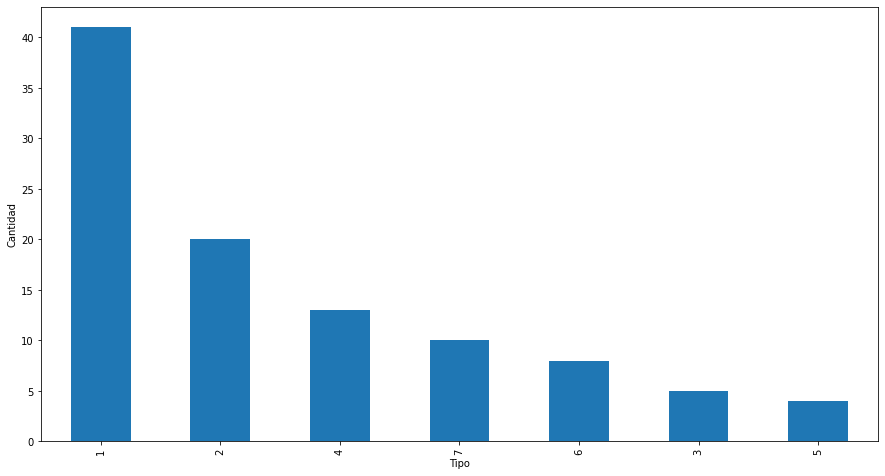

In [ ]:
plt.figure(figsize=(15,8))
df_d.class_type.value_counts().plot(kind= 'bar')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4342136790>,
      dtype=object)

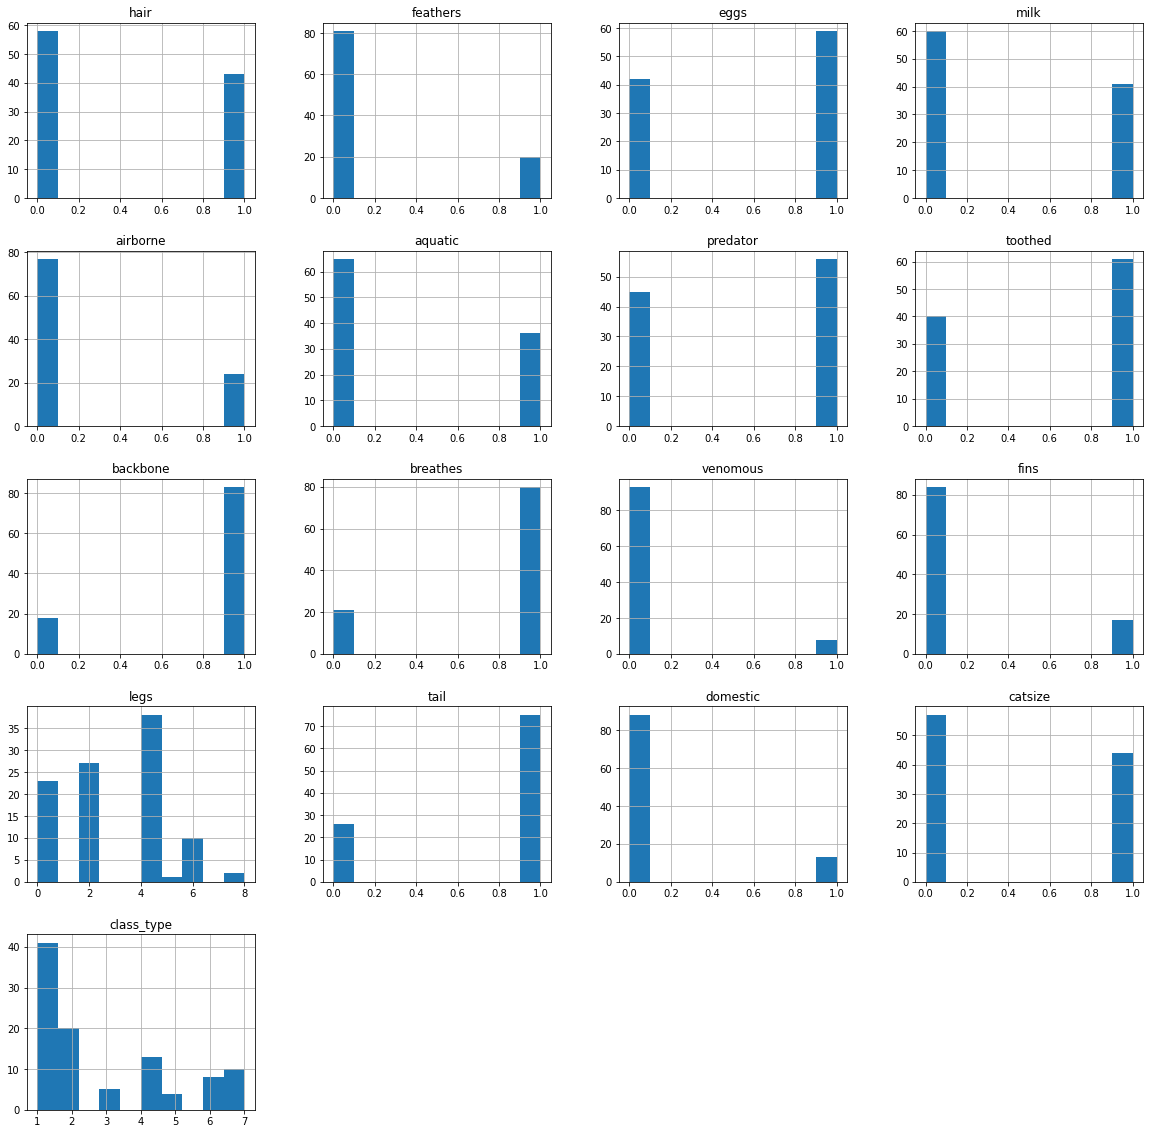

In [ ]:
  fig = plt.figure(figsize = (20,20))
  ax = fig.gca()
  df_d.hist(ax = ax)

In [ ]:
X= df_d.drop( [ 'class_type', 'animal_name' ], axis=1)
y= df_d['class_type']

In [ ]:
X.shape

(101, 16)

In [ ]:
y.shape

(101,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
error=[]
for n in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train,y_train)
  predic_n= knn.predict(X_test)
  error.append(np.mean(predic_n != y_test))

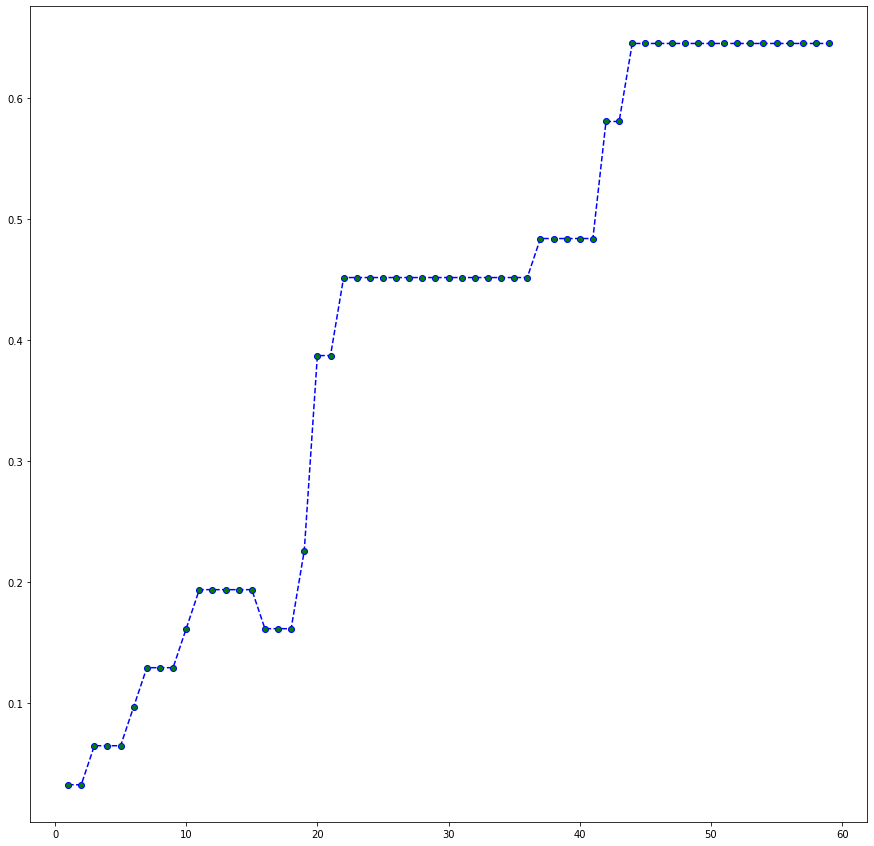

In [ ]:
plt.figure( figsize = (15,15))
plt.plot( range(1,60),error,color='b',linestyle = 'dashed', marker = 'o',markerfacecolor = 'g',markersize='6')

In [ ]:

knn_c = KNeighborsClassifier(n_neighbors=3)# euclidean, minkowski, manhattan
knn_c.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred_Train= knn_c.predict(X_train)
y_pred_Test= knn_c.predict(X_test)

In [ ]:
print("TRAIN ACC" , accuracy_score(y_train,y_pred_Train))
print("TEST ACC" , accuracy_score(y_test,y_pred_Test))

TRAIN ACC 0.9571428571428572
TEST ACC 0.9354838709677419


In [ ]:
confusion_matrix(y_test,y_pred_Test)

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]])